# CSME2 Bonus Point Assignment 1

<div style="text-align: right;font-size: 0.8em">Document Version 1.0.2, released 04/12/2021</div>
For detailed task instructions, please refer to the assignment PDF.

DO NOT CLEAR THE OUTPUT of the notebook you are submitting!

In [1]:
# Add any additional import you need in this cell
import numpy as np
from sklearn.cluster import kmeans_plusplus, KMeans
import scipy.io as scio
import matplotlib.pyplot as plt

np.random.seed(1234)

### Setup
__Task A.1__ Load the data into the following numpy arrays. For the output, only use the first torque variable.
Randomly split the data from the file ```sarcos_inv.mat``` into a training set (80%) and a validation set (20%).

In [2]:
mat1 = scio.loadmat('sarcos_inv.mat')
mat2 = scio.loadmat('sarcos_inv_test.mat')

train_data = mat1.get('sarcos_inv')
test_data = mat2.get('sarcos_inv_test')

# train_data = train_data[10:20,:]
# test_data = test_data[10:20,:]


# Shuffle data so that it can be random splitted
perm = np.random.RandomState(42).permutation(len(train_data))

# Input and output training data

# Split train_data as 80% training data and 20% validation data
n = train_data.shape[0]
xs_train = train_data[perm[:int(n*0.8)], :21]  
ys_train = train_data[perm[:int(n*0.8)], 22].reshape((-1,1))



# Input and output validation data
xs_valid = train_data[int(n*0.8):, :21]  
ys_valid = train_data[int(n*0.8):, 22].reshape((-1,1))

# Input and output test data
xs_test = test_data[:, :21]
ys_test = test_data[:, 22].reshape((-1,1))
# np.random.shuffle(data1)
# x1 = data1[:,0:21]
# y1 = data1[:,22]

# y1 = np.reshape(y1,(len(y1),1))

# split  = round(0.8*len(x1))

# # Input and output training 1data1
# xs_train = x1[:split,:]
# ys_train = y1[:split,:]

# # Input and output validation 1data1
# xs_valid = x1[split:,:]
# ys_valid = y1[split:,:]
# print(ys_valid)

# Input and output test 1data1
xs_test = test_data[:,0:21]
ys_test = test_data[:,22]
ys_test = np.reshape(ys_test,(len(ys_test),1))

In [3]:
# Check for yourself 
# The following should lead (roughly) to output 
# (35587, 21)
# (35587, 1)
# (8897, 21)
# (8897, 1)
# (4449, 21)
# (4449, 1)

print(xs_train.shape)
print(ys_train.shape)
print(xs_valid.shape)
print(ys_valid.shape)
print(xs_test.shape)
print(ys_test.shape)

(35587, 21)
(35587, 1)
(8897, 21)
(8897, 1)
(4449, 21)
(4449, 1)


__Task A.2__ Standardize the data such that
1. Training inputs have mean 0
2. Each training input variable has variance 1
3. The training outputs have mean 0
4. Apply the same transformation to the validation and test data

Implement this manually, i.e., do not use a ready scaler like the one provided by scikit-learn.

In [4]:

def std_data(X):
    
    return (X-np.mean(X,axis = 0))/np.std(X,axis = 0)


# Store the standardized data in the following variables
xs_train_std = std_data(xs_train)
print(xs_train_std)
ys_train_std = std_data(ys_train)

xs_valid_std = std_data(xs_valid)
ys_valid_std = std_data(ys_valid)
print(ys_valid_std.shape)
print(xs_valid_std.shape)
xs_test_std = std_data(xs_test)
ys_test_std = std_data(ys_test)


[[-0.31851944 -0.11134597 -2.20715939 ...  0.37732537  1.86230737
  -0.59458637]
 [ 1.00246972  0.5727362   1.45352934 ... -0.58747539  0.0949612
   1.40751214]
 [-1.15331023 -0.54018094  0.24142679 ... -0.67356592 -0.60626833
   1.19441092]
 ...
 [-2.0960696  -1.58323126  2.5543946  ... -1.70288171  1.13653731
   1.10708797]
 [-1.86608363 -1.0551908   1.24064696 ...  2.88387287 -0.93854162
  -1.82536712]
 [ 1.34027364 -1.14150061  1.00577962 ... -0.42576858  0.48104529
   0.74358347]]
(8897, 1)
(8897, 21)


In [5]:
# Check for yourself
# The following should lead to (roughly) six zeros and three arrays with (approximately) ones
print(np.mean(xs_train_std))
print(np.mean(ys_train_std))
print(np.mean(xs_valid_std))
print(np.mean(ys_valid_std))
print(np.mean(xs_test_std))
print(np.mean(ys_test_std))

print(np.var(xs_train_std, axis=0))
print(np.var(xs_valid_std, axis=0))
print(np.var(xs_test_std, axis=0))

3.465118419636068e-15
9.484019430860921e-17
2.856059530798692e-17
6.069601879034238e-17
-2.7264507890483246e-17
-2.3636845334343634e-16
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


__Task A.3__

In [6]:
# Task A.3.a
# Implement a function estimating the variance
def my_variance(xs):
    """Calculate the empirical variance of a given vector of scalars
    
    Arguments
    xs      1d numpy array
    
    Returns
    The empirical variance of the provided vector
    """
    # Your implementation
    Num = len(xs)
    mean = np.mean(xs)
    sq_error = np.square(xs - mean)
    variance = np.sum(sq_error)/(Num-1)
    return variance

In [7]:
# Task A.3.b
# Calculate the variance of ys_train_std using your function my_variance
var_ys_train = my_variance(ys_train_std)
print (var_ys_train)
# plt.scatter(xs_valid_std,ys_valid_std,var

1.0000281009385714


In [8]:
# Task A.3.c
# Implement a function calculating the SMSE between two 1d numpy arrays given a normalizing factor
def my_smse(z1, z2, s):
    """Calculate the Standardized Mean Squared Error (SMSE)
    
    Arguments
    z1      1d numpy array (usually the predictions)
    z2      1d numpy array (usually the test data)
    s       Normalization factor (usually the variance of the test data)
    
    Returns
    The SMSE of the provided data
    """
    # Your implementation
    N = len(z1)
    error = (z1 - z2)**2
    smse = (np.sum(error))/(N*s)
    
    return smse

## Linear regression
### Simple linear regression
__Task A.4__

In [9]:
# This variable should contain the weights corresponding to simple linear regression (LS criterion, no bias term)
w_lr = np.dot(np.linalg.pinv(xs_train_std),ys_train_std)
# print(w_lr.shape)
# This variable should contain the predictions using w_lr on the validation data
xs_valid_std_new = np.concatenate((np.ones((len(xs_valid_std),1)), xs_valid_std),axis = 1)
print(xs_valid_std_new.shape)

ys_pred_valid = np.dot(xs_valid_std,w_lr)

# residual = ys_pred_valid - ys_valid_std
# mean_r = np.mean(residual)
# std_r = np.std(residual)
# normal_res = (residual - mean_r)/std_r
# plt.scatter(ys_pred_valid,normal_res)

# This should contain the resulting smse
smse_lr = my_smse(ys_pred_valid, ys_valid_std, var_ys_train)
print(smse_lr)

(8897, 22)
0.07566906841154482


### Linear regression with polynomial features
__Task A.5__

In [10]:
# Task A.5.a
def my_poly_features(xs, degree):
    """Generates polynomial features from given data
    
    The polynomial features should include monomials (i.e., x_i, x_i**2 etc)
    and interaction terms (x_1*x_2 etc), but no repetitions.
    The order of the samples should not be changed through the transformation.
    
    Arguments
    xs      2d numpy array of shape (N,D) containing N samples of dimension D
    degree  Maximum degree of polynomials to be considered
    
    Returns
    An (N,M) numpy array containing the transformed input
    """
    # Your implementation
    x1 = np.vander(xs,degree,increasing=True)
    arr = xs.T
    x2 = []
    for i in range(len(arr)):
        x = arr[i]@arr[i+1:]

    
    pass

In [11]:
# Tasks A.5.b
# This variable should contain the weights corresponding to linear regression using polynomial features up to degree 2 and 3
# w_poly2 =
# w_poly3

# This variable should contain the predictions using w_poly2 and w_poly3 on the validation data
# ys_pred_poly2_valid = 
# ys_pred_poly3_valid = 

# This should contain the resulting smse
# smse_poly2 = my_smse(ys_pred_poly2_valid, ys_valid_std, var_ys_train)
# smse_poly3 = my_smse(ys_pred_poly3_valid, ys_valid_std, var_ys_train)

## Clustering
__Task B.1__ Implement the basic $K$-Means algorithm.

In [12]:
def assigning_clusters(X,centroid):
    distances = np.array([np.linalg.norm(X-centroid[i],axis = 1) for i in range(len(centroid))]).T
    
    idx_min = np.array([np.argmin(distance) for distance in distances])  
    return idx_min


def my_kmeans(xs, init_centers, n_iter):
    """Runs the K-Means algorithm from a given initialization
    
    Arguments
    xs            2d numpy array of shape (N,D) containing N samples of dimension D
    init_centers  2d numpy array of shape (K,D) containing the initial cluster centers
    n_iter        Number of iterations of the K-Means algorithm
    
    Returns
    An (K,D) numpy array containing the final cluster centers
    """
    # Your implementation
    
   
    idx_min = assigning_clusters(xs,init_centers)
    
    for i in range(n_iter):
        new_centers = []
        
        for i in range(len(init_centers)):
            new_centers.append(xs[idx_min==i].mean(axis=0))
        new_centers = np.array(new_centers)
        
        idx_min = assigning_clusters(xs,new_centers)      
        if (init_centers == new_centers).any():
            break
    
    
    return new_centers
    

__Task B.2__ Generate test data set and plot it.

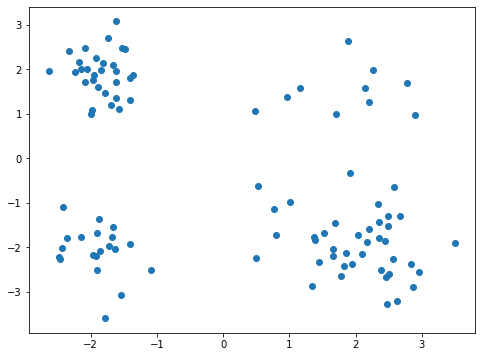

In [13]:
# Test data of shape (100,2)
def gaus_samples (N,p,mu,cvm):
    X= np.random.multivariate_normal(mu, cvm, int(p*N))
    return X

mu1,mu2,mu3,mu4 = [-2,2],[-2,-2],[2,-2],[2,2]
cv1,cv2,cv3,cv4 = 0.2*np.eye(len(mu1)),0.2*np.eye(len(mu1)),0.5*np.eye(len(mu1)),0.5*np.eye(len(mu1))
p1,p2,p3,p4 = 0.3,0.2,0.4,0.1


c1 = gaus_samples(100,p1,mu1,cv1)
c2 = gaus_samples(100,p2,mu2,cv2)
c3 = gaus_samples(100,p3,mu3,cv3)
c4 = gaus_samples(100,p4,mu4,cv4)


xs_cluster_test = np.concatenate((c1,c2,c3,c4))
plt.figure(figsize=(8,6))
plt.scatter(xs_cluster_test[:, 0], xs_cluster_test[:, 1])

__Task B.3__ Run your $K$-Means algorithm on the test data for $K=2,3,4,5$ clusters and plot the final cluster centers.

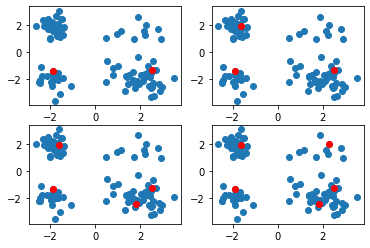

<Figure size 576x432 with 0 Axes>

In [14]:
fig, ax = plt.subplots(2,2)
plt.figure(figsize = (8,6))
for i in range(4):
    K = i+2
    if i < 2 :
        x = 0
        y = i
    else:
        x = 1
        y = i-2
    n_iter = 25
    cntrs,cntrs_idx = kmeans_plusplus(xs_cluster_test, K, random_state=0) 

    new_centers = my_kmeans(xs_cluster_test,cntrs,n_iter)
    ax[x,y].scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
    ax[x,y].scatter(cntrs[:,0],cntrs[:,1],c = 'red')
   

## Radial Basis Function Network
__Task C.1__ Find $K=100$ cluster centers using $K$-Means.

In [15]:
# This 100x21 numpy array should contain the cluster centers
def centroid(X):    
    km = KMeans(n_clusters=100)
    km.fit_predict(X).reshape(-1,1)
    return km.cluster_centers_
xs_centers = centroid(xs_train)
print(xs_centers.shape)

(100, 21)


__Task C.2__ Implement the Gaussian basis functions and transform the data accordingly

In [16]:

def gaussian_basis(X,cluster_center,std=25):
    # for x in range(len(X.T)):
    r = np.array([np.linalg.norm(X-cluster_center[i],axis = 1) for i in range(len(cluster_center))]).T
    
    
    const = (np.sqrt(2*np.pi*std**2))**-1
    # exp = np.exp(-(r**2)/(2*std**2))
    exp = np.exp((-r**2)/(2*std**2))
    # gaussian = ((np.sqrt(2*np.pi*std**2))**-1)*(np.exp(-(r**2)/(2*std**2)))
    gaussian = const*exp
    return gaussian


xs_train_gauss = gaussian_basis(xs_train_std, xs_centers)
xs_train_gauss_new = np.concatenate((np.ones((len(xs_train_gauss),1)), xs_train_gauss),axis = 1)


__Task C.3__ Run simple linear regression on the transformed data and evaluate it on the test set

In [17]:



w_lr_gauss1 = np.dot(np.linalg.pinv(xs_train_gauss_new),ys_train_std)


xs_valid_gauss1 = gaussian_basis(xs_valid_std,xs_centers)
xs_valid_gauss_new = np.concatenate((np.ones((len(xs_valid_gauss1),1)), xs_valid_gauss1),axis = 1)


# This should contain the resulting predictions on the validation data set

ys_pred_gauss_valid1 =  xs_valid_gauss_new @ w_lr_gauss1


# This should contain the corresponding SMSE

smse_gauss1 = my_smse(ys_pred_gauss_valid1, ys_valid_std, var_ys_train)


print(smse_gauss1)

0.09951820860699878


__Open task__ Can you improve the performance of the RBF network?

__Task C.4__ Evaluate your final model (either the one from Task C.3 or your improved model from the open task) on the test data

In [18]:
# This should contain the predictions on the test data set

xs_test_gauss = gaussian_basis(xs_test_std,xs_centers)
xs_test_gauss_new = np.concatenate((np.ones((len(xs_test_gauss),1)), xs_test_gauss),axis = 1)
ys_pred_test = xs_test_gauss_new @ w_lr_gauss1

# This should contain the resulting SMSE on the test data
smse_test = my_smse(ys_pred_test, ys_test_std, var_ys_train)
print(smse_test)

0.051769871477786916
